In [1]:
from colorrefinement import *
import json

In [2]:
#with open('datasets/ppi/ppi-G.json') as f:
#    data = json.load(f)

#graph = nx.node_link_graph(data)

In [3]:
graph = nx.gnp_random_graph(150, 0.05)

In [4]:

from cProfile import Profile
from pstats import SortKey, Stats
with Profile() as prof:
    cr = ColorRefinement(graph)
    (
        Stats(prof)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        .print_stats(40)
    )

         22619 function calls (21577 primitive calls) in 0.009 seconds

   Ordered by: cumulative time
   List reduced from 65 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      600    0.001    0.000    0.006    0.000 colorrefinement.py:77(__init__)
      600    0.002    0.000    0.004    0.000 {built-in method builtins.sorted}
     5978    0.002    0.000    0.003    0.000 colorrefinement.py:121(__lt__)
        1    0.000    0.000    0.002    0.002 iostream.py:276(<lambda>)
        1    0.000    0.000    0.002    0.002 colorrefinement.py:9(__init__)
        1    0.000    0.000    0.002    0.002 colorrefinement.py:51(_refine)
4670/3628    0.001    0.000    0.001    0.000 colorrefinement.py:93(__eq__)
      600    0.001    0.000    0.001    0.000 {built-in method builtins.hash}
     4014    0.001    0.000    0.001    0.000 colorrefinement.py:58(<genexpr>)
     4479    0.001    0.000    0.001    0.000 colorrefinement.py:130(__hash_

In [5]:
depth = graph.color_refinement.depth
depth

2

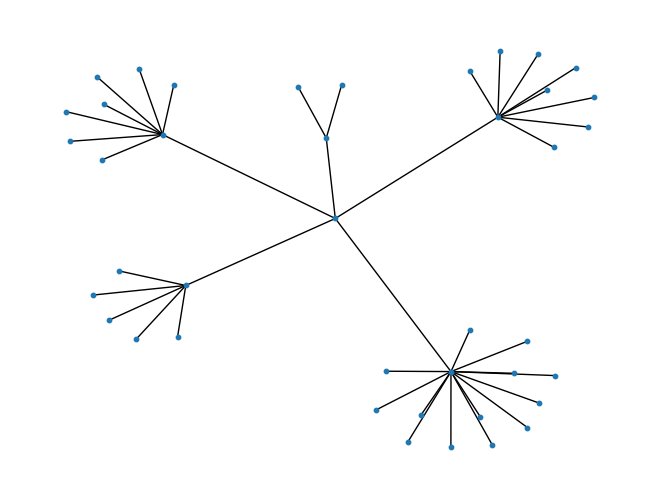

In [6]:
import matplotlib.pyplot as plt

nx.draw(cr.node_colors[2][10].to_networkx(), node_size=10)
plt.show()

In [7]:
cr.node_colors[2][depth].chi(2)

(⊤ ∧ (∃=2x.(E(x, y) ∧ (⊤ ∧ (∃=6y.(E(x, y) ∧ ⊤)) ∧ ¬∃y.(E(x, y) ∧ ⊤))) ∧ ∃=1x.(E(x, y) ∧ (⊤ ∧ (∃=9y.(E(x, y) ∧ ⊤)) ∧ ¬∃y.(E(x, y) ∧ ⊤))) ∧ ∃=1x.(E(x, y) ∧ (⊤ ∧ (∃=7y.(E(x, y) ∧ ⊤)) ∧ ¬∃y.(E(x, y) ∧ ⊤))) ∧ ∃=2x.(E(x, y) ∧ (⊤ ∧ (∃=13y.(E(x, y) ∧ ⊤)) ∧ ¬∃y.(E(x, y) ∧ ⊤))) ∧ ∃=2x.(E(x, y) ∧ (⊤ ∧ (∃=12y.(E(x, y) ∧ ⊤)) ∧ ¬∃y.(E(x, y) ∧ ⊤)))) ∧ ¬∃x.(E(x, y) ∧ ⊤))

In [8]:
from c2 import *

In [9]:
phi = ExistsGeq(30, Var.x, ExistsGeq(10, Var.y, E(Var.x, Var.y)))
phi

∃≥30x.∃≥10y.E(x, y)

In [10]:
len([node for node in graph.nodes if graph.degree[node] >= 10])

40

In [11]:
from cProfile import Profile
from pstats import SortKey, Stats
with Profile() as prof:
    phi.evaluate(graph)
    (
        Stats(prof)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        .print_stats(40)
    )

         76278 function calls (76166 primitive calls) in 0.042 seconds

   Ordered by: cumulative time
   List reduced from 76 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    15314    0.020    0.000    0.035    0.000 c2.py:733(_evaluate)
    29822    0.011    0.000    0.011    0.000 reportviews.py:1267(__contains__)
    29822    0.004    0.000    0.004    0.000 reportviews.py:1088(__call__)
        2    0.000    0.000    0.000    0.000 traitlets.py:709(__set__)
        2    0.000    0.000    0.000    0.000 traitlets.py:3638(set)
      108    0.000    0.000    0.000    0.000 c2.py:179(_formula_free_variables)
        2    0.000    0.000    0.000    0.000 traitlets.py:690(set)
      128    0.000    0.000    0.000    0.000 enum.py:1251(__hash__)
        1    0.000    0.000    0.000    0.000 pstats.py:108(__init__)
        7    0.000    0.000    0.000    0.000 socket.py:621(send)
      108    0.000    0.000    0.000    0.000 report

In [12]:
v = next(v for v in graph.nodes if graph.degree[v] >= 10)
v, phi.evaluate(graph, v)

(6, True)

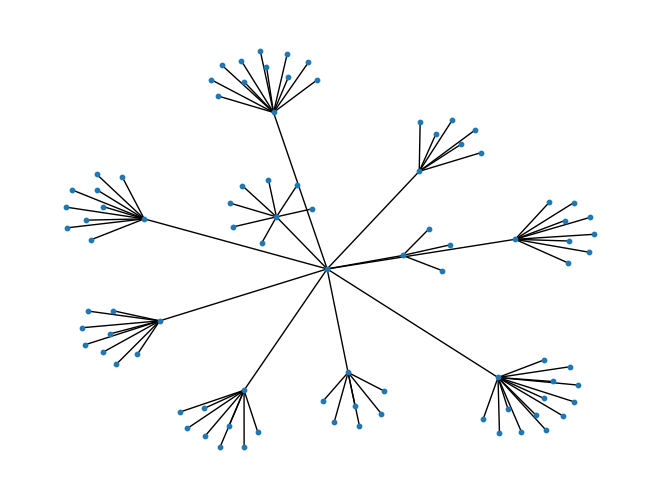

In [13]:
nx.draw(cr.node_colors[depth][v].to_networkx(), node_size=10)

In [14]:
from preprocessing import CRPreprocessor

In [17]:
prepr = CRPreprocessor([ExistsGeq(10, Var.x, E(Var.x, Var.y))])

In [19]:
prepr([graph for _ in range(len(graph.nodes))], list(graph.nodes)).shape

(150, 1)